In [7]:
import numpy as np
import calendar

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values
# df = df.dropna(subset='salary_year_avg')                ## Dropping NaN values
# df = df.dropna()
def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [ ]:
# 75032

## Customizing Line Plot

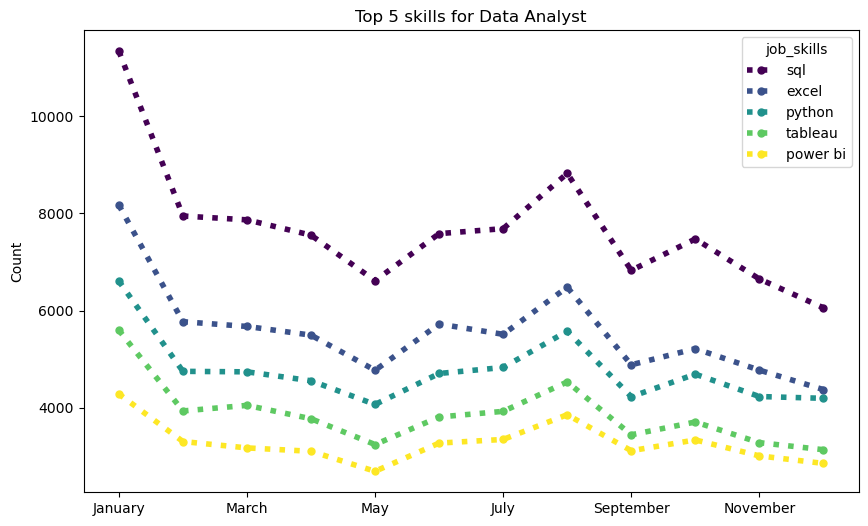

In [29]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()
## Copying only Data Analyst jobs

df_da['job_posted_month_number'] = df_da['job_posted_date'].dt.month
## Getting the month number for each job


df_da = df_da.explode('job_skills')
## Exploding the list elements to individual row


df_da_pivot = df_da.pivot_table(index='job_posted_month_number',columns='job_skills', aggfunc='size', fill_value=0)
## Creates a pivot table counting the occurrences of each skill per month from the df_da DataFrame


df_da_pivot.loc['Total'] = df_da_pivot.sum()
## Adding a row at the bottom that has the total of each skill


df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
## Sorting it

df_da_pivot = df_da_pivot.drop('Total')
## Dropping Total

df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format ='%m').strftime('%B'))
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot = df_da_pivot.drop(columns='job_posted_month_number')

df_da_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    linestyle = ':', 
    #linestyle = '--'
    colormap='viridis',
    # marker='*',
    marker='o',
    markersize = 5,
    figsize=(10,6))
# Plots a line chart of the monthly occurrences for the top 5 job skills from the pivot table




plt.title('Top 5 skills for Data Analyst')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Customizing Scatter plot

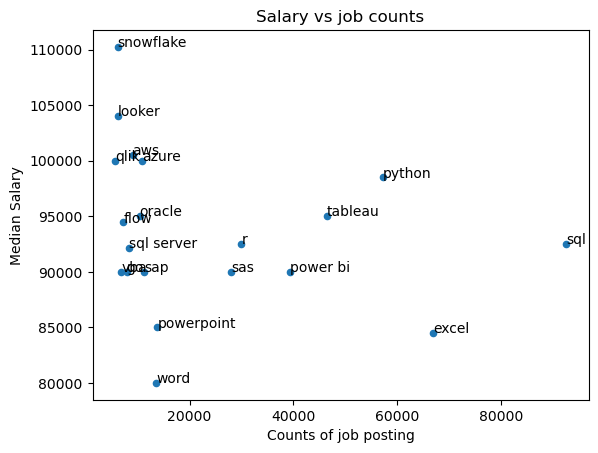

In [33]:
## Luke method

df_exploded = df[df['job_title_short']=='Data Analyst']
df_exploded=df_exploded.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.ylabel("Median Salary")
plt.xlabel("Counts of job posting")
plt.title("Salary vs job counts")

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)


plt.show()

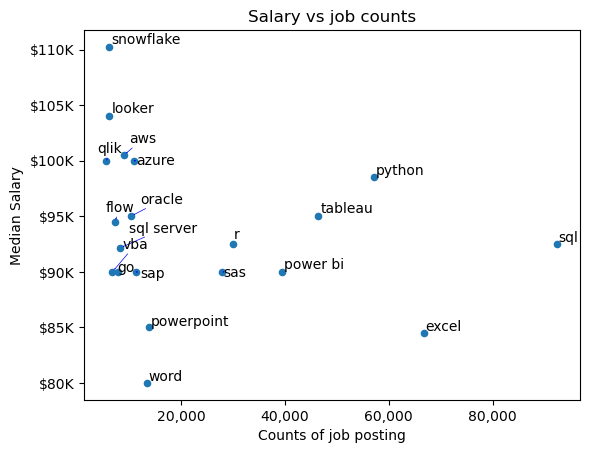

In [43]:
from adjustText import adjust_text

## Luke method

df_exploded = df[df['job_title_short']=='Data Analyst']
df_exploded=df_exploded.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)


# fig, ax = plt.subplots()

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')


plt.ylabel("Median Salary")
plt.xlabel("Counts of job posting")
plt.title("Salary vs job counts")
texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color ='b', lw=0.5))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))


plt.show()